In [159]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
!pip3 install torch torchvision
import numpy as np
import os
import torch.nn as nn
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
class rnn_basic(nn.Module):
    def __init__(self, inputs, neurons):
        super(rnn_basic, self).__init__()
        self.x = torch.randn(inputs, neurons)
        self.y = torch.randn(neurons, neurons) 
        self.a = torch.zeros(1, neurons)  
    def forward(self, X0, X1):
        self.y1 = torch.tanh(torch.matmul(X0, self.x) + self.a) 
        self.y2 = torch.tanh(torch.matmul(self.y1, self.y) + torch.matmul(X1, self.x) + self.a)
        return self.y1, self.y2

In [161]:
x0 = torch.tensor( [ [0,1,2,0], [3,4,5,0], [6,7,8,0], [9,0,1,0] ] ,dtype = torch.float)
x1 = torch.tensor( [ [9,8,7,0], [0,0,0,0], [6,5,4,0], [3,2,1,0] ] ,dtype = torch.float)
i = 4 
neurons = 5 
model = rnn_basic(i, neurons)
value_y1, value_y2 = model(x0, x1)

In [162]:
value_y1

tensor([[-0.9999, -0.6180, -0.9699, -0.9992,  0.6468],
        [-1.0000,  0.0141, -1.0000, -1.0000,  1.0000],
        [-1.0000,  0.6352, -1.0000, -1.0000,  1.0000],
        [-0.9462,  1.0000,  0.5521,  0.9939,  1.0000]])

In [163]:
value_y2

tensor([[-1.0000,  0.9872, -1.0000, -1.0000,  1.0000],
        [-0.5490, -0.1459,  0.8813, -0.3212,  0.5569],
        [-1.0000,  0.9710, -1.0000, -1.0000,  1.0000],
        [-0.8560,  0.9789, -0.9806,  0.5832,  0.9960]])

In [164]:
class rnn_single(nn.Module):
    def __init__(self, inputs, neurons):
        self.b = torch.zeros(1, neurons) 
        super(rnn_single, self).__init__()
        self.x = torch.randn(inputs, neurons) 
        self.y = torch.randn(neurons, neurons) 
    def forward(self, X0, X1):
        self.y1 = torch.tanh(torch.matmul(X0, self.x) + self.b) 
        self.y2 = torch.tanh(torch.matmul(self.y1, self.y) +   torch.matmul(X1, self.x) + self.b)
        return self.y1, self.y2

In [165]:
neurons = 1
i = 4
x0 = torch.tensor( [ [0,1,2,0], [3,4,5,0], [6,7,8,0], [9,0,1,0] ] ,dtype = torch.float)
x1 = torch.tensor( [ [9,8,7,0], [0,0,0,0], [6,5,4,0], [3,2,1,0] ] ,dtype = torch.float)
model = rnn_single(i, neurons)
value_y1, value_y2 = model(x0, x1)

In [166]:
value_y1

tensor([[-0.4440],
        [-1.0000],
        [-1.0000],
        [-1.0000]])

In [167]:
value_y2

tensor([[-1.0000],
        [ 0.0553],
        [-1.0000],
        [-1.0000]])

In [168]:
n1 = torch.randn(4, 5)
z = torch.tensor([[[0,1,2], [3,4,5], [6,7,8], [9,0,1]],[[9,8,7], [0,0,0], [6,5,4], [3,2,1]]], dtype = torch.float) 
rnn = nn.RNNCell(3, 5)
for j in range(2):
    n1 = rnn(z[j], n1)
    output = []
    output.append(n1)
output

[tensor([[ 0.9978, -0.9605,  0.9999,  0.9820,  0.9985],
         [ 0.7935, -0.0086,  0.2407,  0.0497,  0.6999],
         [ 0.9891, -0.7445,  0.9967,  0.9522,  0.9882],
         [ 0.8531,  0.0209,  0.7317,  0.8171,  0.7887]],
        grad_fn=<TanhBackward0>)]

In [169]:
class clean_rnn(nn.Module):
    def __init__(self, batch_size, inputs, neurons):
        super(clean_rnn, self).__init__()
        
        self.rnn = nn.RNNCell(inputs, neurons)
        self.n1 = torch.randn(batch_size, neurons) 
        
    def forward(self, X):
        for j in range(2):
            self.n1 = self.rnn(X[j], self.n1)
            output = []
            output.append(self.n1) 
        return output, self.n1

In [170]:
input = 3
neurons = 5
batch_fix = 4

z = torch.tensor([[[0,1,2], [3,4,5], [6,7,8], [9,0,1]],[[9,8,7], [0,0,0], [6,5,4], [3,2,1]]], dtype = torch.float) 
model = clean_rnn(batch_fix,input, neurons)
output_val, states_val = model(z)


In [171]:
output_val

[tensor([[-0.9999, -0.9621,  0.9997,  1.0000,  0.9992],
         [-0.1715, -0.4392, -0.2777,  0.6919,  0.1095],
         [-0.9968, -0.8584,  0.9886,  0.9997,  0.9886],
         [-0.9649, -0.4802,  0.3610,  0.9761,  0.9503]],
        grad_fn=<TanhBackward0>)]

In [172]:
states_val

tensor([[-0.9999, -0.9621,  0.9997,  1.0000,  0.9992],
        [-0.1715, -0.4392, -0.2777,  0.6919,  0.1095],
        [-0.9968, -0.8584,  0.9886,  0.9997,  0.9886],
        [-0.9649, -0.4802,  0.3610,  0.9761,  0.9503]],
       grad_fn=<TanhBackward0>)

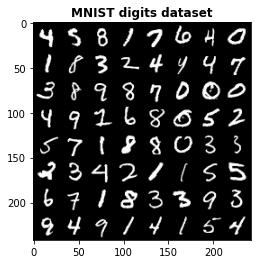

In [173]:
transform = transforms.Compose([transforms.ToTensor()])
batch_size = 64
set_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
load_data = torch.utils.data.DataLoader(set_data, batch_size=batch_size, shuffle=True, num_workers=2)

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)),cmap ='Greens')

imshow(torchvision.utils.make_grid(images))
plt.title('MNIST digits dataset', fontweight ="bold")
plt.show()